<a href="https://colab.research.google.com/github/sashaarlinskaya/-_-/blob/main/22_11_24_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1. Полиномиальные модели

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")

In [ ]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


Выделяем необходимые столбцы в переменные:

In [ ]:
X = data.x
y = data.y

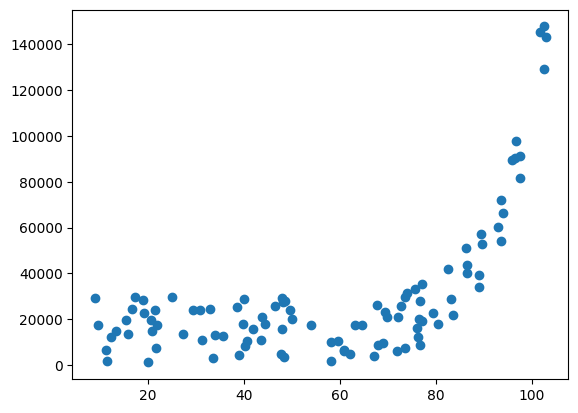

In [ ]:
plt.scatter(X, y)

Модель линейной регрессии

In [ ]:
pip install scikit-learn


In [ ]:
X = pd.DataFrame(X)

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


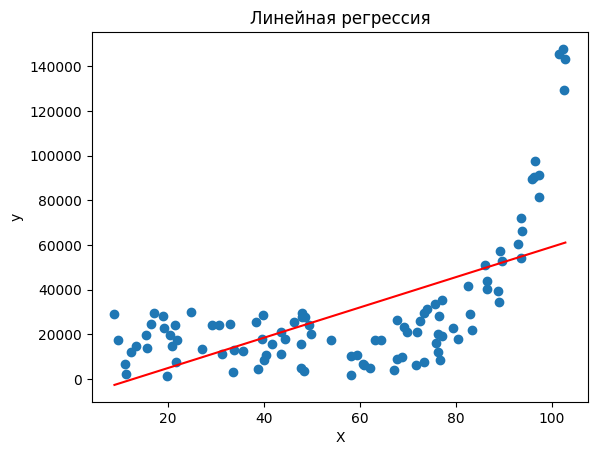

In [ ]:
xx = np.linspace(X.x.min(), X.x.max(), 100).reshape(-1, 1)
yy = linear.predict(xx)

plt.scatter(X.x, y)  # Рассеянный график
plt.plot(xx, yy, c='r')  # Линия предсказаний
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.show()

In [ ]:
linear.score(X, y)

0.37467360318911636

 полиномиальная регрессия второго порядка

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformation = PolynomialFeatures(degree=2)

In [ ]:
transformation.fit(X)

PolynomialFeatures()

In [ ]:
X_2 = transformation.transform(X)

In [ ]:
X_2.shape
X_2[:5]

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [ ]:
poly_2d = LinearRegression().fit(X_2, y)

In [ ]:
xx_2d = transformation.transform(pd.DataFrame(xx))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


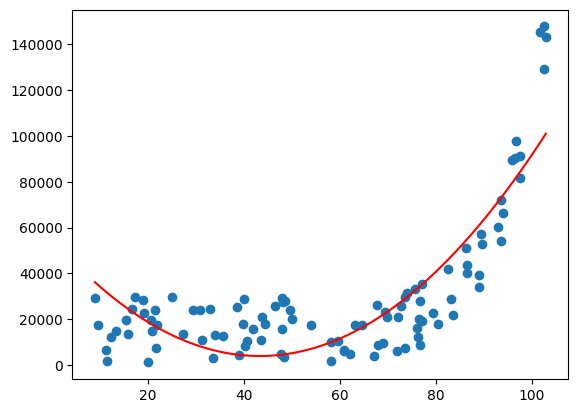

In [ ]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [ ]:
poly_2d.score(X_2, y)

0.7359753787024842

Классификация

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

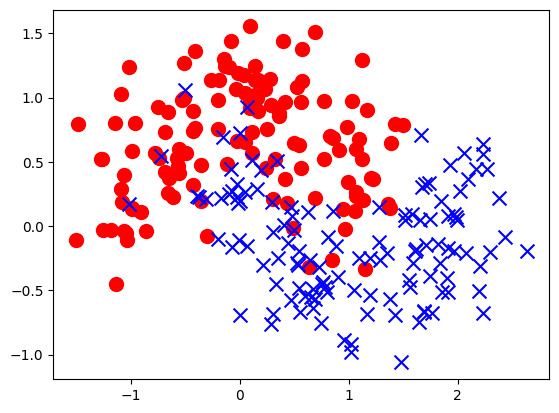

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

Модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression().fit(X, y)

<ipython-input-42-bc09005cf8c9>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
<ipython-input-42-bc09005cf8c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


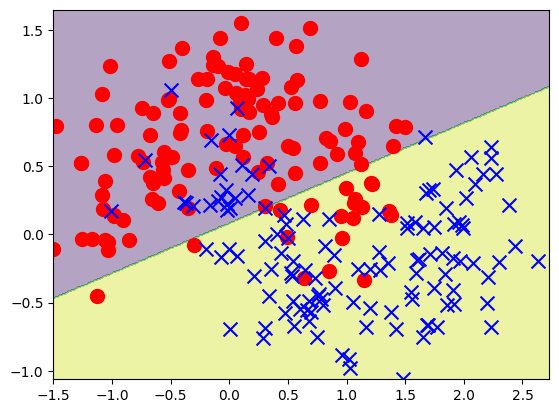

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
logistic.score(X, y)

0.832

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape

(250, 9)

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


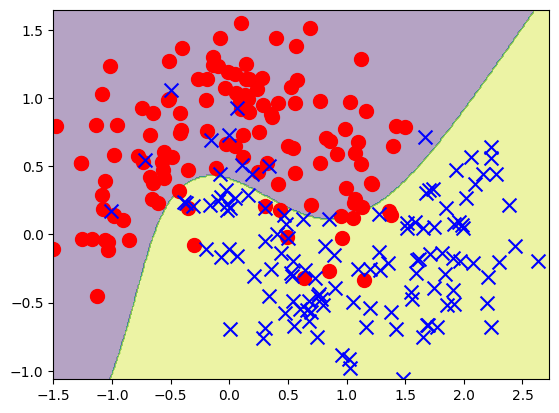

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
class_3.score(X_3, y)

0.9

Регрессия на реальных данных

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [ ]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.6997471890109161

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8659203541563689

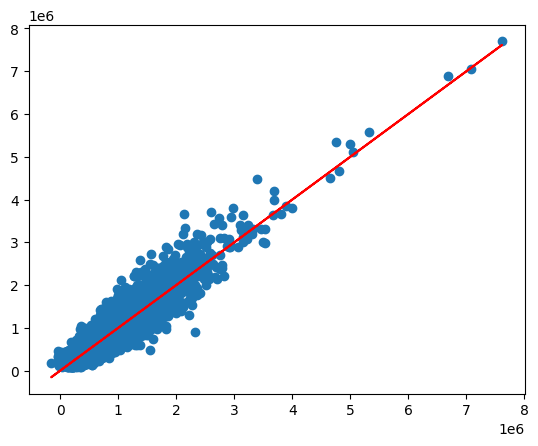

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Самостоятельные задания (забудем)

3.2. Метод опорных векторов

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)


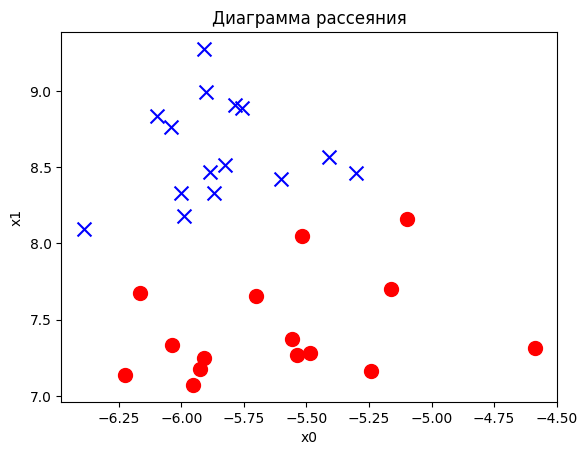

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
from sklearn.svm import SVC

# Теперь вы можете создать и обучить модель SVM
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)


SVC(C=100, kernel='linear')

In [ ]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
svm_linear.intercept_

array([-64.2533988])

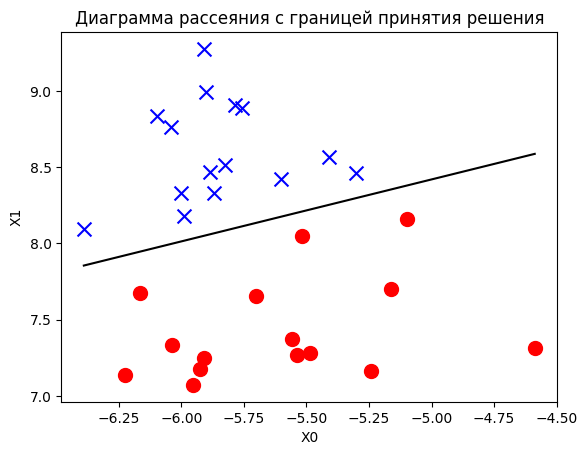

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [ ]:
svm_linear.n_support_

array([1, 2], dtype=int32)

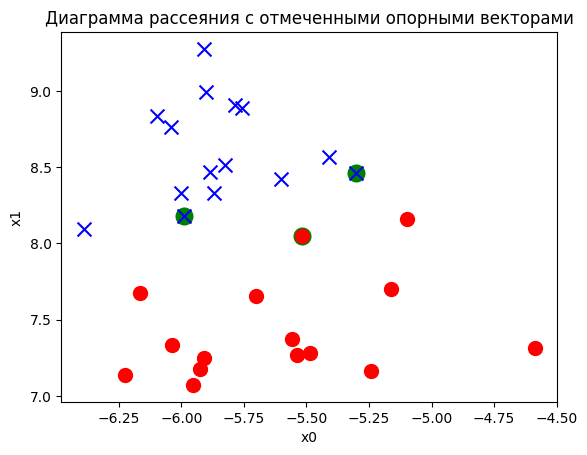

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

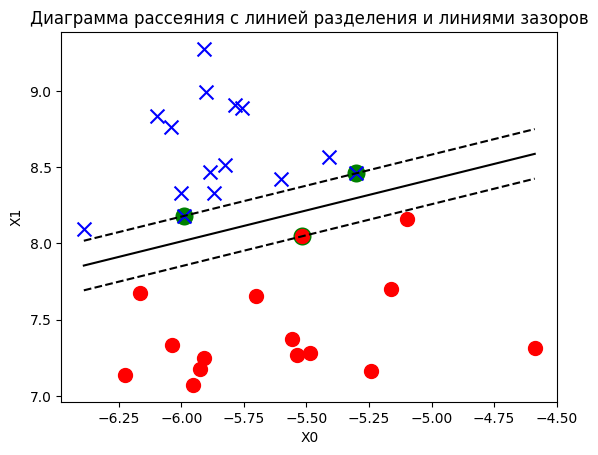

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

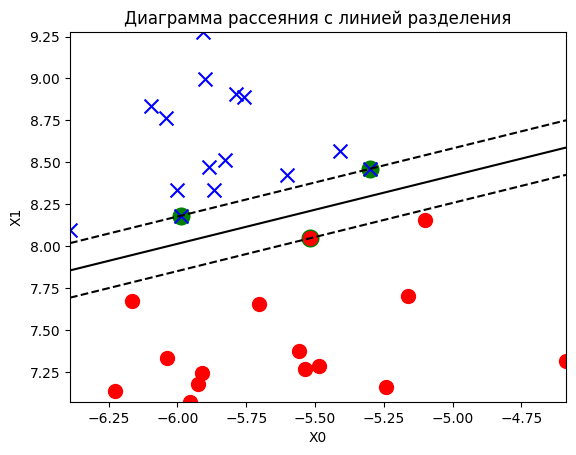

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

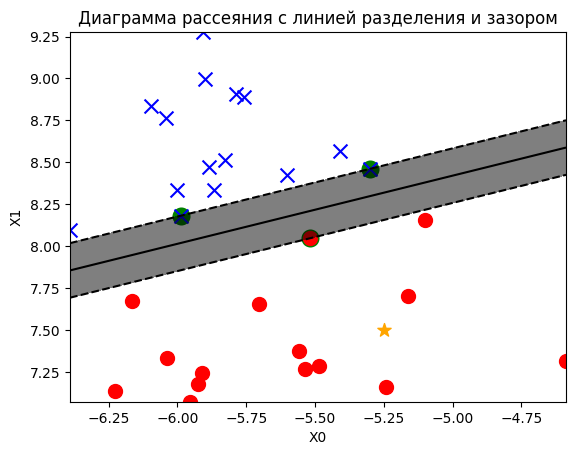

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new = [[-5.25, 7.5]]

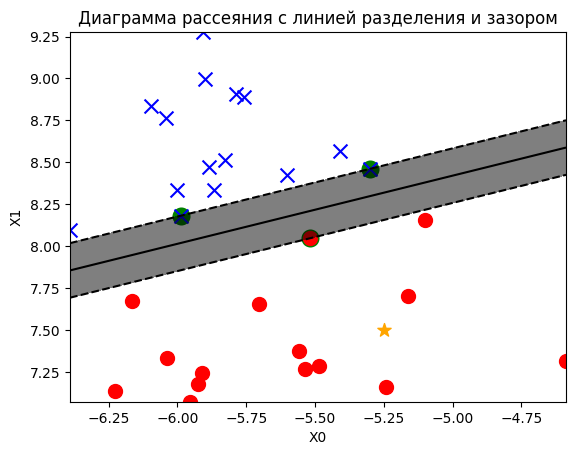

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
svm_linear.predict(observation_new)

array([0])

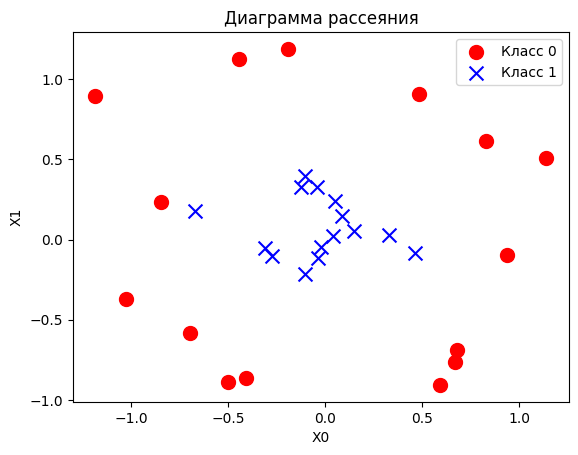

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Генерация данных
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

# Построение графика
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()


In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

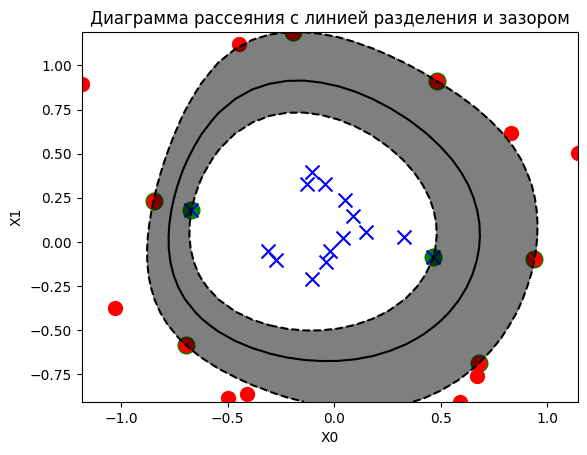

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

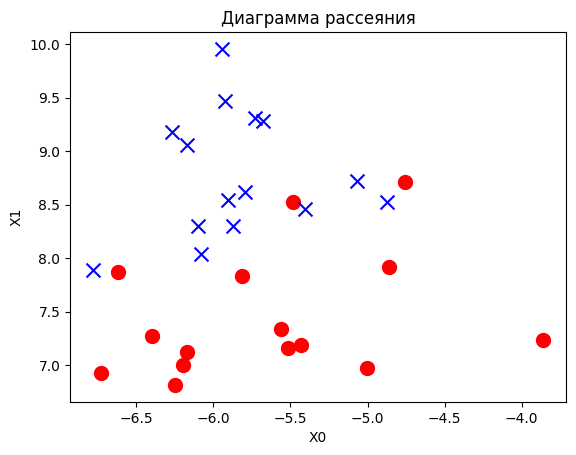

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

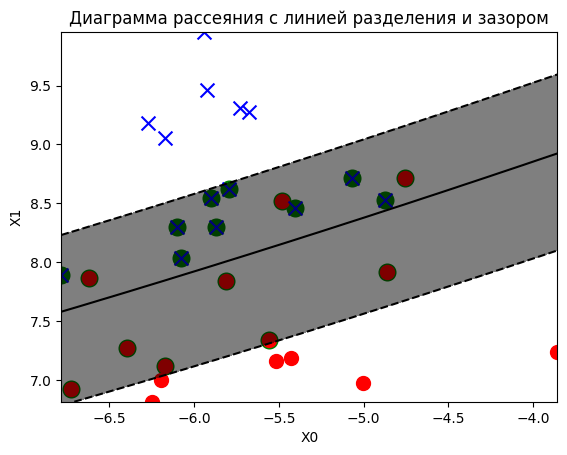

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [ ]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Можно сделать вывод, что данная модель, хоть и не идеальная, все же довольно точно справляется с классификацией.

# Задания для самостоятельного выполнения

В выполненной работе добавьте замер времени обучения каждой модели.

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для регрессии
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")
X = data.x
y = data.y

# Модель линейной регрессии
linear = LinearRegression()

# Замер времени для линейной регрессии
start_time = time.time()
linear.fit(X.values.reshape(-1, 1), y)
linear_time = time.time() - start_time
print(f"Время обучения линейной регрессии: {linear_time:.4f} секунд")

# Модель полиномиальной регрессии второго порядка
transformation = PolynomialFeatures(degree=2)
X_2 = transformation.fit_transform(X.values.reshape(-1, 1))

# Замер времени для полиномиальной регрессии второго порядка
start_time = time.time()
poly_2d = LinearRegression().fit(X_2, y)
poly_2d_time = time.time() - start_time
print(f"Время обучения полиномиальной регрессии второго порядка: {poly_2d_time:.4f} секунд")

# Загрузка данных для классификации
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

# Логистическая регрессия (линейная)
logistic = LogisticRegression()

# Замер времени для логистической регрессии
start_time = time.time()
logistic.fit(X, y)
logistic_time = time.time() - start_time
print(f"Время обучения логистической регрессии (линейной): {logistic_time:.4f} секунд")

# Модель логистической регрессии с полиномиальными признаками третьего порядка
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

# Замер времени для логистической регрессии с полиномиальными признаками
start_time = time.time()
class_3 = LogisticRegression().fit(X_3, y)
class_3_time = time.time() - start_time
print(f"Время обучения логистической регрессии с полиномиальными признаками: {class_3_time:.4f} секунд")

# Загрузка данных для предсказания цен на дома в округе King county
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Линейная регрессия для данных о ценах на дома
reg_kc_multiple = LinearRegression()

# Замер времени для линейной регрессии на данных о ценах на дома
start_time = time.time()
reg_kc_multiple.fit(X_kc_prices, y_kc_prices)
reg_kc_multiple_time = time.time() - start_time
print(f"Время обучения линейной регрессии для данных о ценах на дома: {reg_kc_multiple_time:.4f} секунд")

# Полиномиальная регрессия второго порядка для данных о ценах на дома
poly_features_kc_prices = PolynomialFeatures(degree=2)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

# Замер времени для полиномиальной регрессии второго порядка на данных о ценах на дома
start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc_time = time.time() - start_time
print(f"Время обучения полиномиальной регрессии второго порядка для данных о ценах на дома: {reg_poly2_kc_time:.4f} секунд")

# Вывод предсказанных значений для полиномиальной регрессии
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)


Время обучения линейной регрессии: 0.0159 секунд
Время обучения полиномиальной регрессии второго порядка: 0.0049 секунд
Время обучения логистической регрессии (линейной): 0.0101 секунд
Время обучения логистической регрессии с полиномиальными признаками: 0.0068 секунд
Время обучения линейной регрессии для данных о ценах на дома: 0.0155 секунд
Время обучения полиномиальной регрессии второго порядка для данных о ценах на дома: 0.6883 секунд


2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели

In [2]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для регрессии
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv")
X = data.x
y = data.y

# Модель линейной регрессии
linear = LinearRegression()

# Функция для замера времени и оценки модели
def evaluate_polynomial_regression(degree, X, y):
    transformation = PolynomialFeatures(degree=degree)
    X_poly = transformation.fit_transform(X.values.reshape(-1, 1))

    start_time = time.time()
    model = LinearRegression().fit(X_poly, y)
    training_time = time.time() - start_time

    score = model.score(X_poly, y)

    return score, training_time

# Пятый порядок
score_5, time_5 = evaluate_polynomial_regression(5, X, y)
print(f"Порядок 5 - R²: {score_5:.4f}, Время обучения: {time_5:.4f} секунд")

# Десятый порядок
score_10, time_10 = evaluate_polynomial_regression(10, X, y)
print(f"Порядок 10 - R²: {score_10:.4f}, Время обучения: {time_10:.4f} секунд")

# Сотый порядок
score_100, time_100 = evaluate_polynomial_regression(100, X, y)
print(f"Порядок 100 - R²: {score_100:.4f}, Время обучения: {time_100:.4f} секунд")


Порядок 5 - R²: 0.9217, Время обучения: 0.0014 секунд
Порядок 10 - R²: 0.9232, Время обучения: 0.0021 секунд
Порядок 100 - R²: 0.7925, Время обучения: 0.0027 секунд


3. То же самое проделайте с датасетом для классификации и "King county".

In [3]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Загрузка данных для классификации
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
X = data.drop(["y"], axis=1)
y = data["y"]

# Функция для замера времени и оценки модели
def evaluate_polynomial_classification(degree, X, y):
    # Преобразуем признаки с полиномами
    transformation = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = transformation.fit_transform(X)

    start_time = time.time()
    model = LogisticRegression(max_iter=1000).fit(X_poly, y)
    training_time = time.time() - start_time

    score = model.score(X_poly, y)

    return score, training_time

# Пятый порядок
score_5_class, time_5_class = evaluate_polynomial_classification(5, X, y)
print(f"Классификация Порядок 5 - Accuracy: {score_5_class:.4f}, Время обучения: {time_5_class:.4f} секунд")

# Десятый порядок
score_10_class, time_10_class = evaluate_polynomial_classification(10, X, y)
print(f"Классификация Порядок 10 - Accuracy: {score_10_class:.4f}, Время обучения: {time_10_class:.4f} секунд")

# Сотый порядок
score_100_class, time_100_class = evaluate_polynomial_classification(100, X, y)
print(f"Классификация Порядок 100 - Accuracy: {score_100_class:.4f}, Время обучения: {time_100_class:.4f} секунд")


Классификация Порядок 5 - Accuracy: 0.9160, Время обучения: 0.0366 секунд
Классификация Порядок 10 - Accuracy: 0.9240, Время обучения: 0.1050 секунд
Классификация Порядок 100 - Accuracy: 0.5000, Время обучения: 0.1444 секунд


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Контрольные вопросы
1. В чем заключается суть метода множественной регрессии?

- Суть метода множественной регрессии заключается в установлении зависимости между одной целевой переменной (зависимой переменной) и несколькими признаками (независимыми переменными). Этот метод позволяет моделировать, как несколько факторов одновременно влияют на результат, что полезно для прогнозирования, анализа и интерпретации взаимосвязей.

2. Какие основные недостатки применения полиномиальных признаков на практике?

- Переобучение: Высокая степень полинома может подгонять модель под шум в данных, снижая обобщающую способность.
- Рост вычислительной сложности: С увеличением степени полинома растет число признаков, что делает обучение ресурсоемким.
- Чувствительность к масштабу данных: Полиномиальные признаки требуют тщательной нормализации для корректной работы модели.
- Проблемы интерпретации: Коэффициенты высоких степеней сложны для анализа и объяснения.
- Склонность к мультиколлинеарности: Полиномиальные признаки могут быть сильно коррелированы, что ухудшает стабильность модели.2. Какие основные недостатки применения полиномиальных признаков на практике?

- Переобучение: Высокая степень полинома может подгонять модель под шум в данных, снижая обобщающую способность.
- Рост вычислительной сложности: С увеличением степени полинома растет число признаков, что делает обучение ресурсоемким.
- Чувствительность к масштабу данных: Полиномиальные признаки требуют тщательной нормализации для корректной работы модели.
- Проблемы интерпретации: Коэффициенты высоких степеней сложны для анализа и объяснения.
- Склонность к мультиколлинеарности: Полиномиальные признаки могут быть сильно коррелированы, что ухудшает стабильность модели.

3. В каких случая введение полиномиальных признаков может быть полезным?

- Нелинейная зависимость
- Малый объем данных
- Пространство признаков невыразительное: Если исходные признаки недостаточно информативны, полиномиальные признаки могут добавить полезную информацию.
- Простая интерпретация в низких степенях: Полиномы небольшой степени (2 или 3) иногда позволяют интерпретировать зависимости в данных.
- Улучшение линейных моделей: Полиномиальные признаки могут расширить возможности линейных моделей без перехода к более сложным алгоритмам.3. В каких случая введение полиномиальных признаков может быть полезным?

- Нелинейная зависимость
- Малый объем данных
- Пространство признаков невыразительное: Если исходные признаки недостаточно информативны, полиномиальные признаки могут добавить полезную информацию.
- Простая интерпретация в низких степенях: Полиномы небольшой степени (2 или 3) иногда позволяют интерпретировать зависимости в данных.
- Улучшение линейных моделей: Полиномиальные признаки могут расширить возможности линейных моделей без перехода к более сложным алгоритмам.

4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?

- Требование к объему оперативной памяти растет комбинаторно с увеличением степени полинома и количества признаков, так как объем данных увеличивается за счет всех возможных комбинаций признаков.4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?

- Требование к объему оперативной памяти растет комбинаторно с увеличением степени полинома и количества признаков, так как объем данных увеличивается за счет всех возможных комбинаций признаков.

5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?

- Зависимость может быть не линейной, а квадратичной или включать взаимодействие двух признаков
- Если такие комбинации не добавить, модель не сможет учесть их вклад.
- Полиномиальные признаки дают модели возможность приближать сложные функции (например, кривые, поверхности) вместо ограниченности линейными границами.
- Включение всех степеней до заданной гарантирует, что не упущены потенциально значимые комбинации признаков.5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?

- Зависимость может быть не линейной, а квадратичной или включать взаимодействие двух признаков
- Если такие комбинации не добавить, модель не сможет учесть их вклад.
- Полиномиальные признаки дают модели возможность приближать сложные функции (например, кривые, поверхности) вместо ограниченности линейными границами.
- Включение всех степеней до заданной гарантирует, что не упущены потенциально значимые комбинации признаков.

6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?

Линейный вид графика не обязательно означает, что модель линейная. Это может быть результатом структуры данных, их зависимости, регуляризации или особенностей построения графика.6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?

Линейный вид графика не обязательно означает, что модель линейная. Это может быть результатом структуры данных, их зависимости, регуляризации или особенностей построения графика.

# Задания для самостоятельного выполнения 3.2.

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

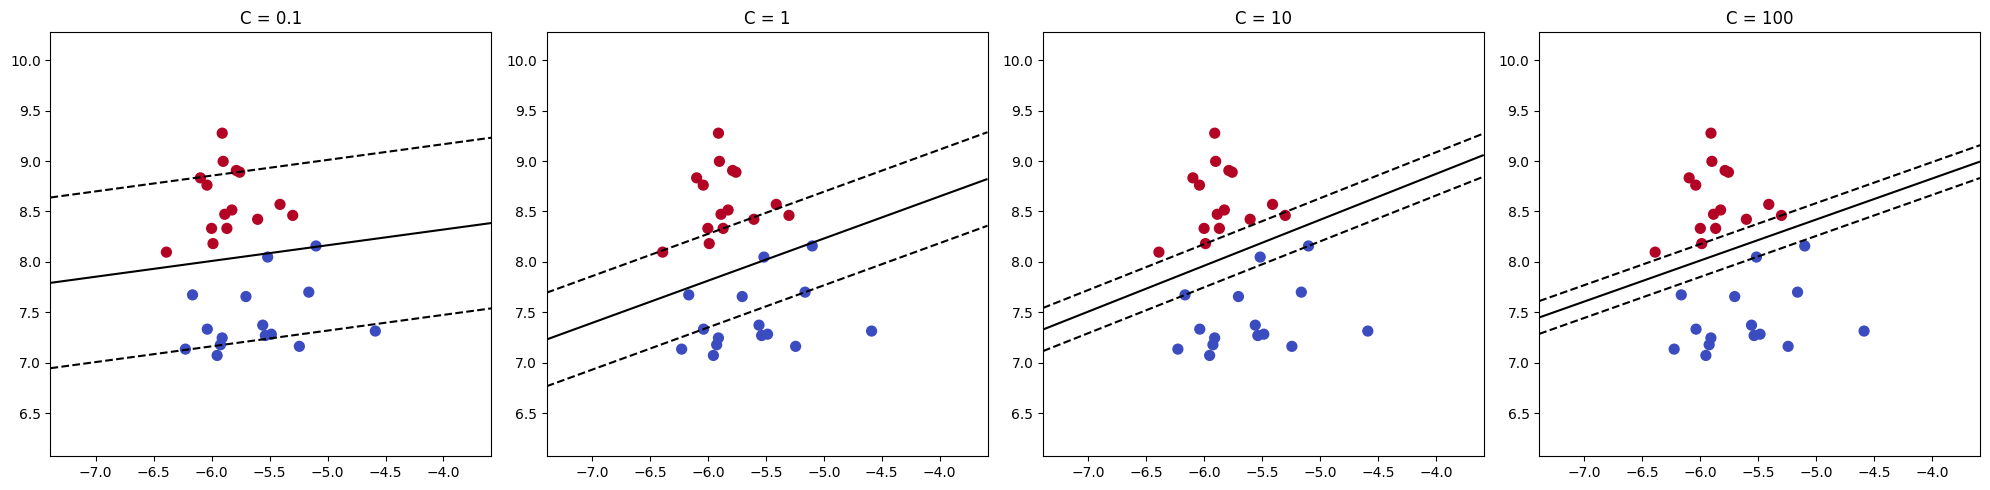

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Генерация линейно разделимого датасета
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Эксперименты с разными значениями C
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Построение сетки
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    axes[i].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    axes[i].set_title(f"C = {C}")

plt.tight_layout()
plt.show()


2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

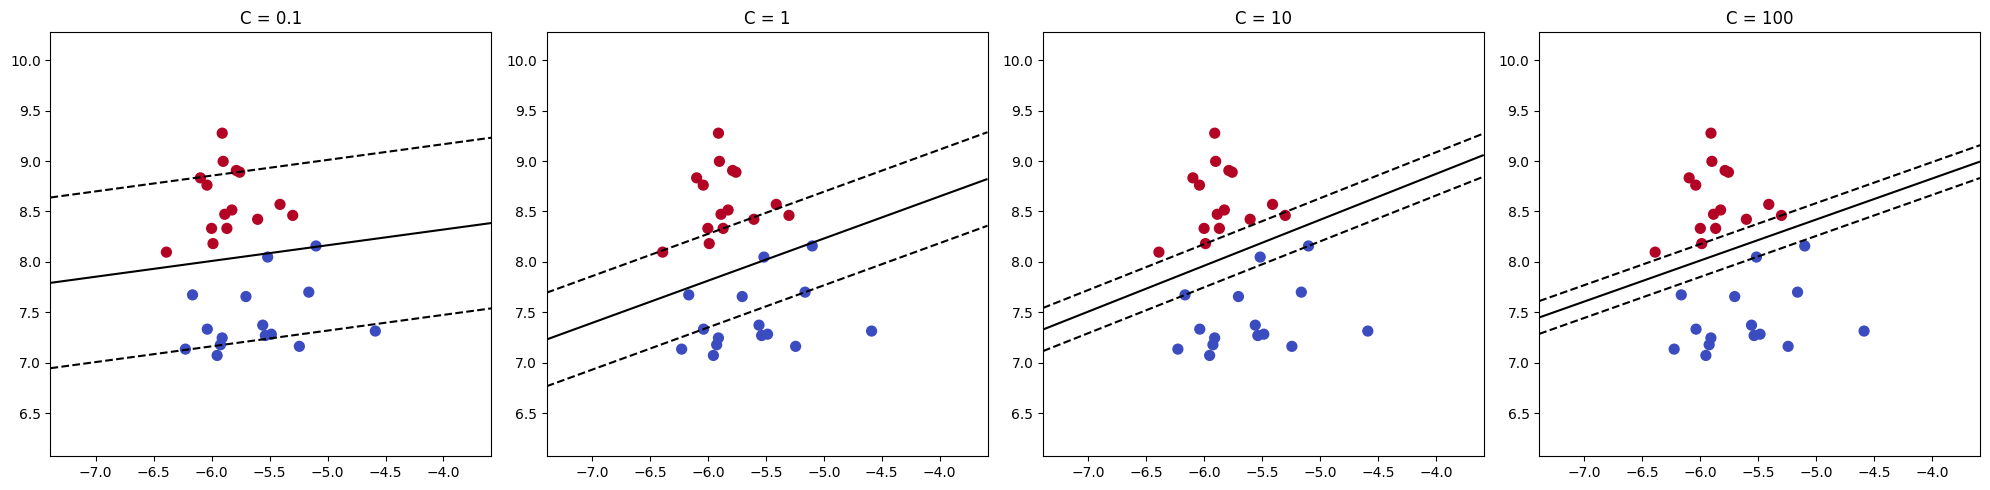

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Генерация линейно разделимого датасета
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Эксперименты с разными значениями C
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # Построение сетки
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    axes[i].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    axes[i].set_title(f"C = {C}")

plt.tight_layout()
plt.show()


3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

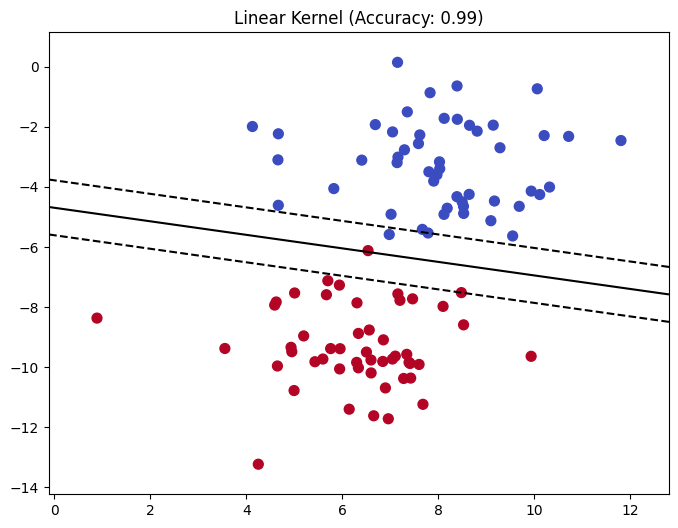

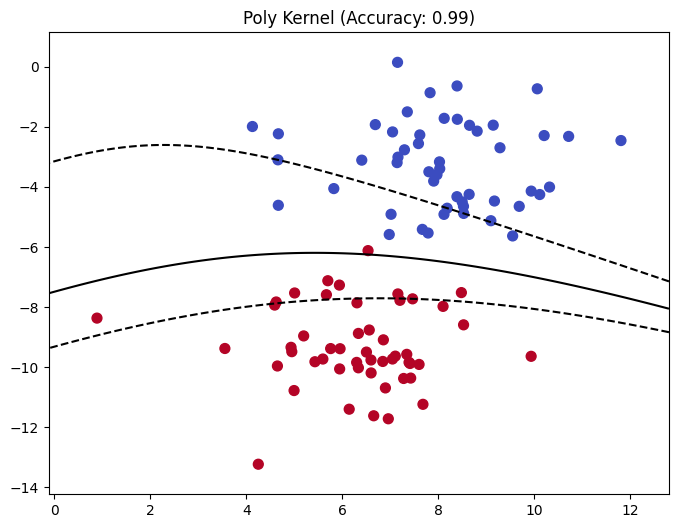

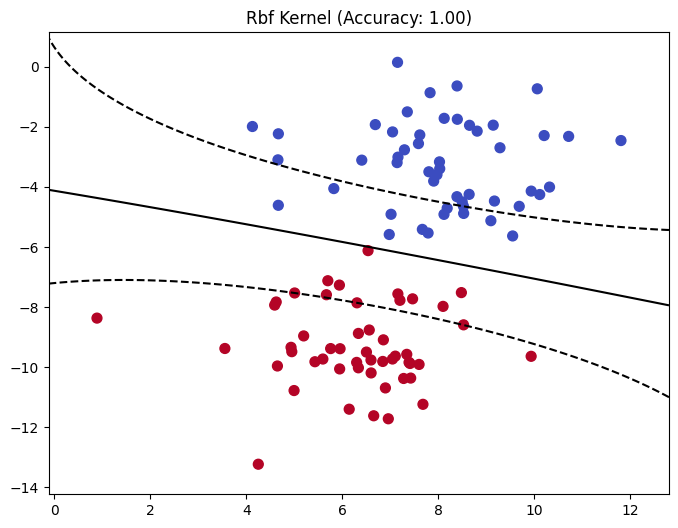

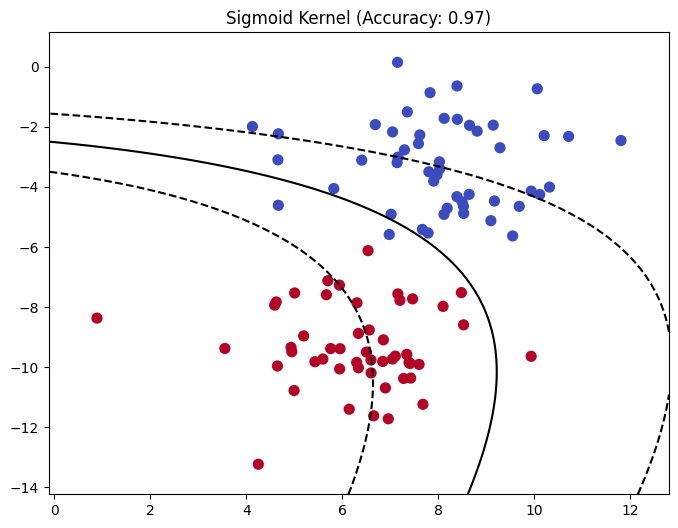

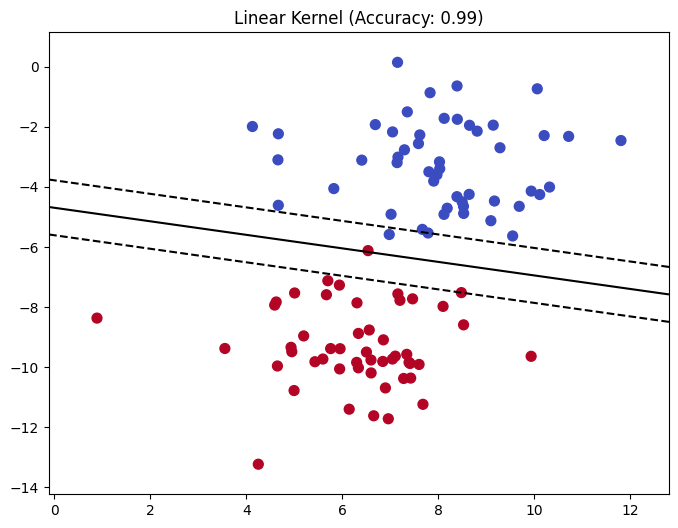

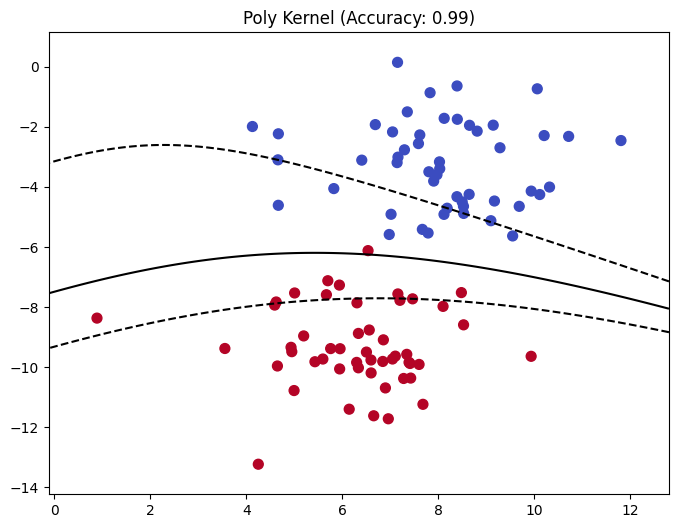

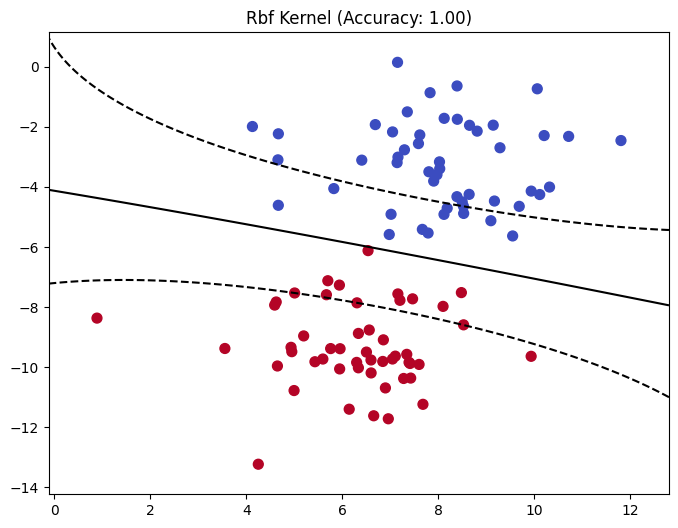

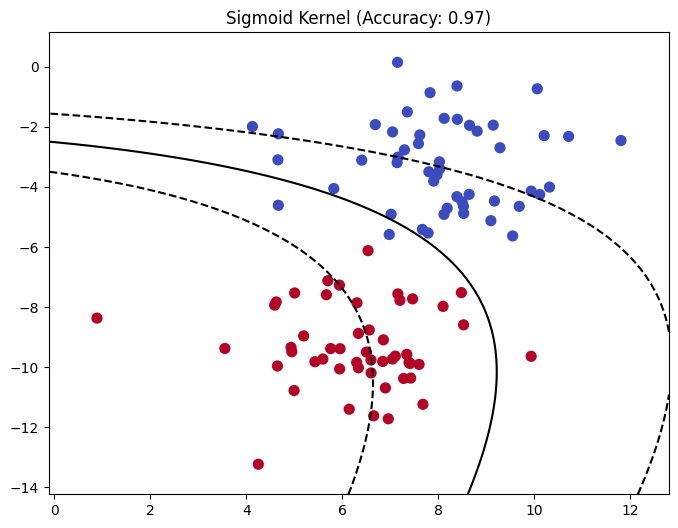

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Генерация линейно неразделимого датасета
X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Различные ядра для SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def plot_decision_boundary(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

# Анализ для каждого ядра
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, degree=3)  # degree для полиномиального ядра
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_decision_boundary(svm, X, y, f"{kernel.capitalize()} Kernel (Accuracy: {accuracy:.2f})")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Генерация линейно неразделимого датасета
X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Различные ядра для SVM
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def plot_decision_boundary(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

# Анализ для каждого ядра
for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, degree=3)  # degree для полиномиального ядра
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_decision_boundary(svm, X, y, f"{kernel.capitalize()} Kernel (Accuracy: {accuracy:.2f})")


4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

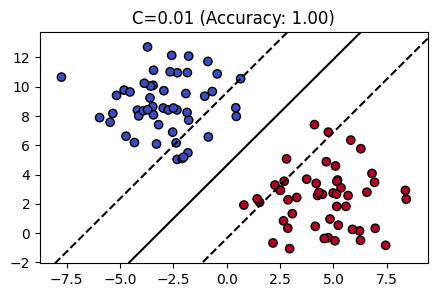

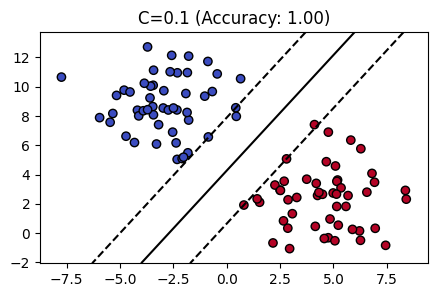

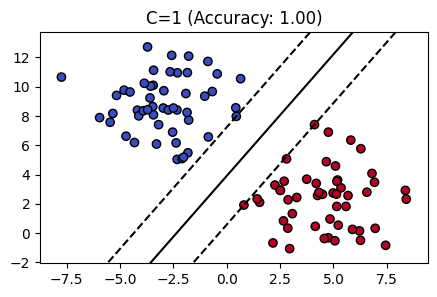

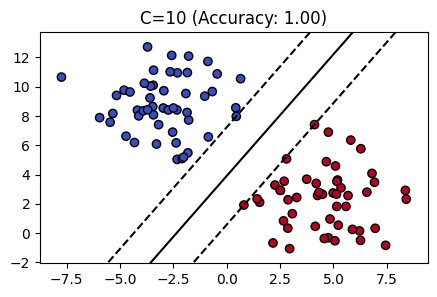

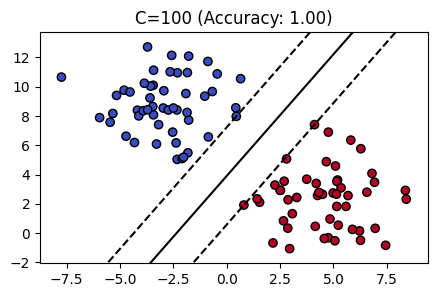

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Генерация линейно неразделимого датасета
X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=42, cluster_std=2)

# Функция для визуализации
def plot_svc_decision(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

# Анализ при разных значениях C
C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_svc_decision(svm, X, y, f"C={C} (Accuracy: {accuracy:.2f})")


# Контрольные вопросы

1. Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?

- SVC использует более общий алгоритм для SVM, подходит для любых ядер, включая линейное. При использовании линейного ядра работает так же, как и LinearSVC, но может быть медленнее.

- LinearSVC оптимизирован для работы только с линейным ядром и использует более эффективный метод оптимизации (метод стохастического градиентного спуска), что делает его быстрее на больших датасетах.
2. Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?

- Линейное ядро:

Граница решения: Прямая или гиперплоскость.
Используется, когда данные линейно разделимы или почти линейно разделимы.
- Полиномиальное ядро:

Граница решения: Кривая, которая может быть сложной, в зависимости от степени полинома.
Полезно для данных, которые не могут быть разделены прямой, но могут быть разделены с помощью кривой.
- Гауссово (RBF) ядро:

Граница решения: Сложная, часто «волнообразная» и гибкая, может адаптироваться к данным с произвольной формой.
Очень мощное ядро, которое может работать с сильно перекрывающимися классами, создает зазор вокруг каждого класса.
3. Как метод опорных векторов работает в задачах множественной классификации?

Метод опорных векторов (SVM) для задач множественной классификации обычно реализуется с помощью подходов "один против всех" (OvA) или "один против одного" (OvO).

- Один против всех (OvA):

Для каждого класса строится отдельный классификатор, который отличает данный класс от всех остальных.
В результате получается столько классификаторов, сколько классов в задаче.
Для классификации нового примера каждый классификатор выдает вероятность принадлежности к своему классу, а итоговое решение принимает классификатор с наибольшей вероятностью.

- Один против одного (OvO):

Для каждой пары классов строится отдельный классификатор, то есть общее количество классификаторов равно числу пар классов.
В процессе классификации каждый классификатор решает, какой из двух классов относится к примеру, и итоговое решение принимается большинством голосов.
В библиотеке scikit-learn класс SVC автоматически использует подход OvA для многоклассовых задач, если количество классов больше двух.

Метод опорных векторов с различными ядрами (например, линейное или RBF) может быть применен для многоклассовой классификации, где границы решений между классами будут учитывать все возможные разделения.
4. Как метод опорных векторов может быть использован для решения задачи регрессии?

Метод опорных векторов (SVM) может быть использован для решения задачи регрессии. В этом случае метод известен как «опорно-векторная регрессия».

Принцип работы заключается в поиске гиперплоскости, при которой риск в многомерном пространстве будет минимальным. По сравнению с традиционной регрессионной моделью SVM оценивает коэффициенты путём минимизации квадратичных потерь. Так, если прогнозное значение попадает в область гиперплоскости, то потери равны нулю, в противном случае — разности прогнозного и фактического значений.

Если данные расположены так, что нельзя провести прямую линию, которая бы чётко разделила их на две группы. Например, если точки расположены в виде окружности, то прямая линия не сможет их разделить на внутренние и внешние. В этом случае SVM может использовать нелинейные функции для преобразования данных в более высокоразмерное пространство.